In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Quantzig_data.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(119390, 32)

In [4]:
pd.isnull(df).sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
country=df['country']
country.describe()

count     118902
unique       177
top          PRT
freq       48590
Name: country, dtype: object

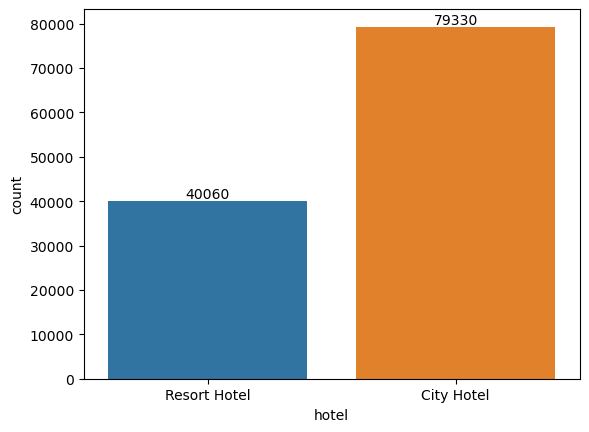

In [6]:

ax = sns.countplot(x = 'hotel',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

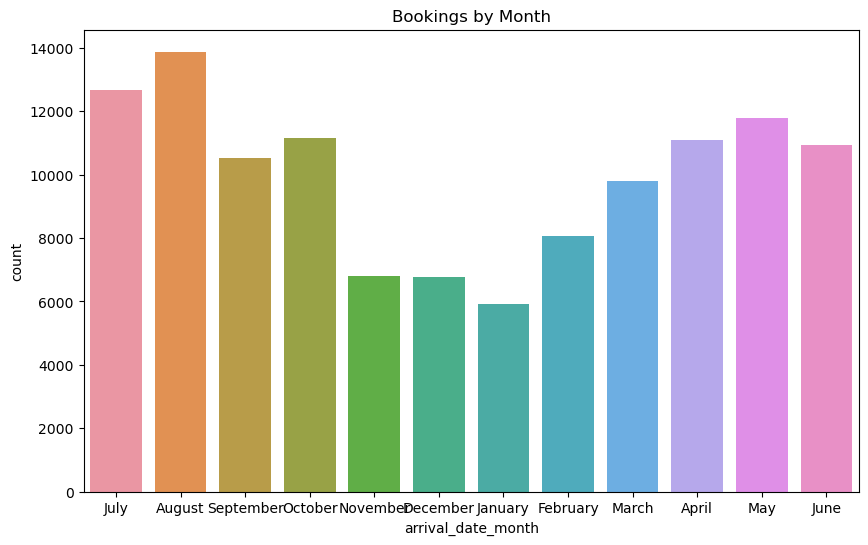

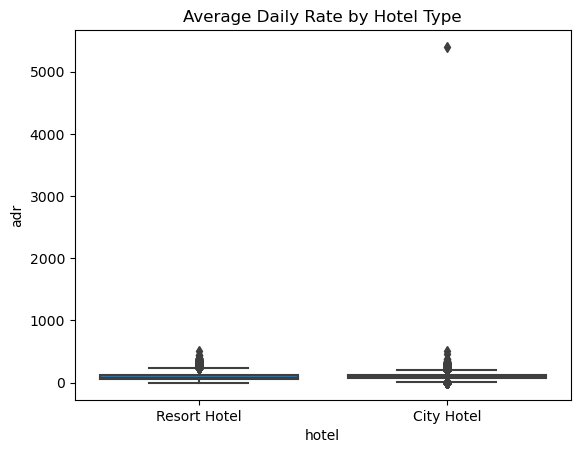

In [7]:
# Visualizing relationships
plt.figure(figsize=(10,6))
sns.countplot(x='arrival_date_month', data=df)
plt.title('Bookings by Month')
plt.show()

# Boxplot for ADR by hotel type
sns.boxplot(x='hotel', y='adr', data=df)
plt.title('Average Daily Rate by Hotel Type')
plt.show()

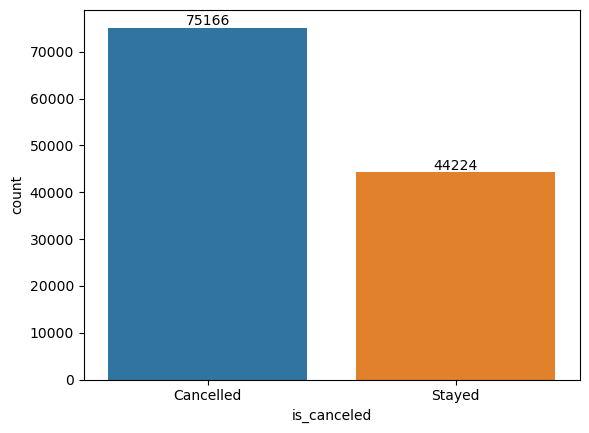

In [8]:

ax = sns.countplot(x = 'is_canceled',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

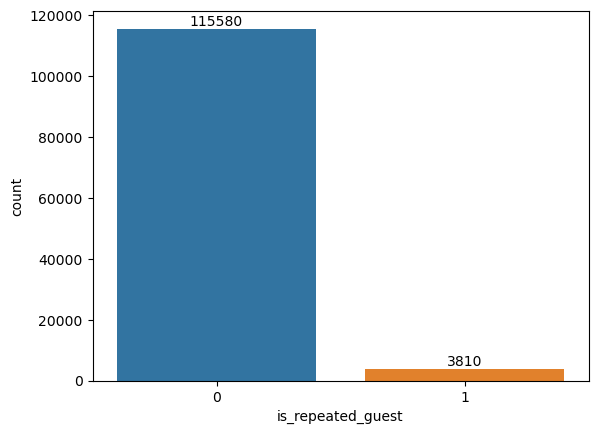

In [11]:
ax = sns.countplot(x = 'is_repeated_guest',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

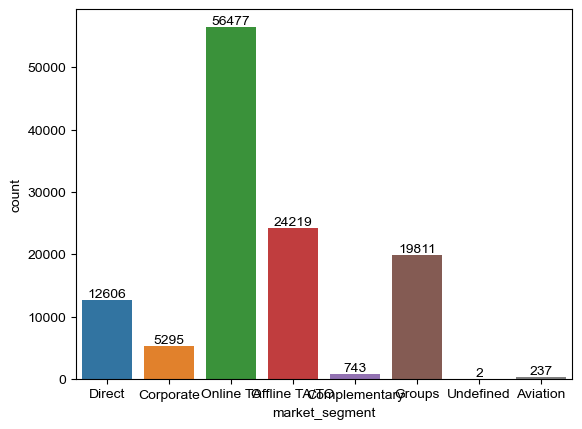

In [9]:
ax = sns.countplot(x = 'market_segment',data = df)

for bars in ax.containers:
    ax.bar_label(bars) 
    
sns.set(rc={'figure.figsize':(10,5)})

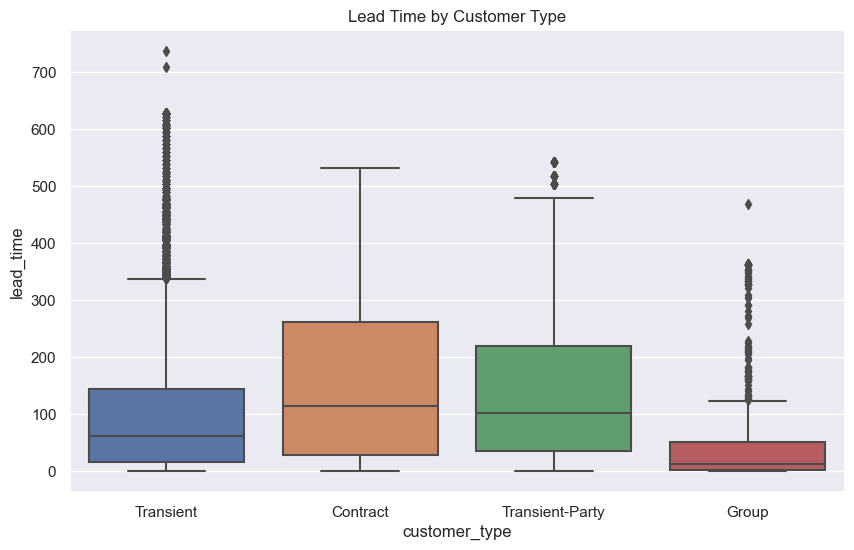

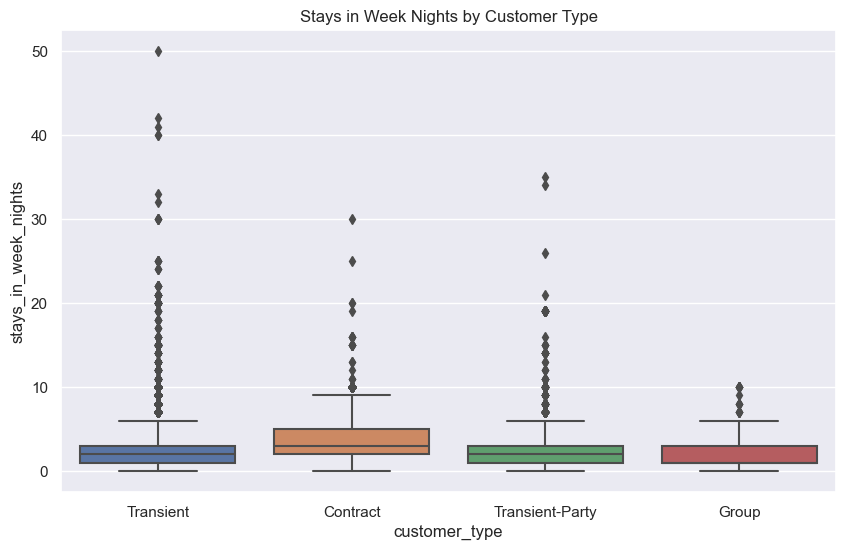

In [10]:
# Analyze booking behavior by customer type
plt.figure(figsize=(10, 6))
sns.boxplot(x='customer_type', y='lead_time', data=df)
plt.title('Lead Time by Customer Type')
plt.show()

# Analyze stays by customer type
plt.figure(figsize=(10, 6))
sns.boxplot(x='customer_type', y='stays_in_week_nights', data=df)
plt.title('Stays in Week Nights by Customer Type')
plt.show()


In [11]:
df.dropna(inplace=True)

# Customer Segment Analysis
Use clustering techniques to segment the customers based on relevant features such as booking behavior and demographics.

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = df[['adr', 'stays_in_week_nights', 'adults', 'children', 'babies']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(features_scaled)
df['segment'] = clusters

# Analyze the segments
for i in range(4):
    print(f"Segment {i+1}:")
    segment = df[df['segment'] == i]
    print(segment.describe())


Segment 1:
        lead_time  arrival_date_year  arrival_date_week_number  \
count   69.000000          69.000000                 69.000000   
mean    71.884058        2021.608696                 37.710145   
std    100.217636           0.731987                 11.736195   
min      0.000000        2021.000000                  1.000000   
25%      6.000000        2021.000000                 33.000000   
50%     23.000000        2021.000000                 43.000000   
75%     70.000000        2022.000000                 46.000000   
max    364.000000        2023.000000                 53.000000   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count                  69.000000                69.000000   
mean                   12.405797                 1.144928   
std                     6.415328                 0.911937   
min                     2.000000                 0.000000   
25%                     8.000000                 0.000000   
50%                    12.00

# Pricing Drivers Identification
We need to analyze factors that affect room pricing, such as adr, lead_time, arrival_date_month, and reservation_status.

a. Correlation Analysis

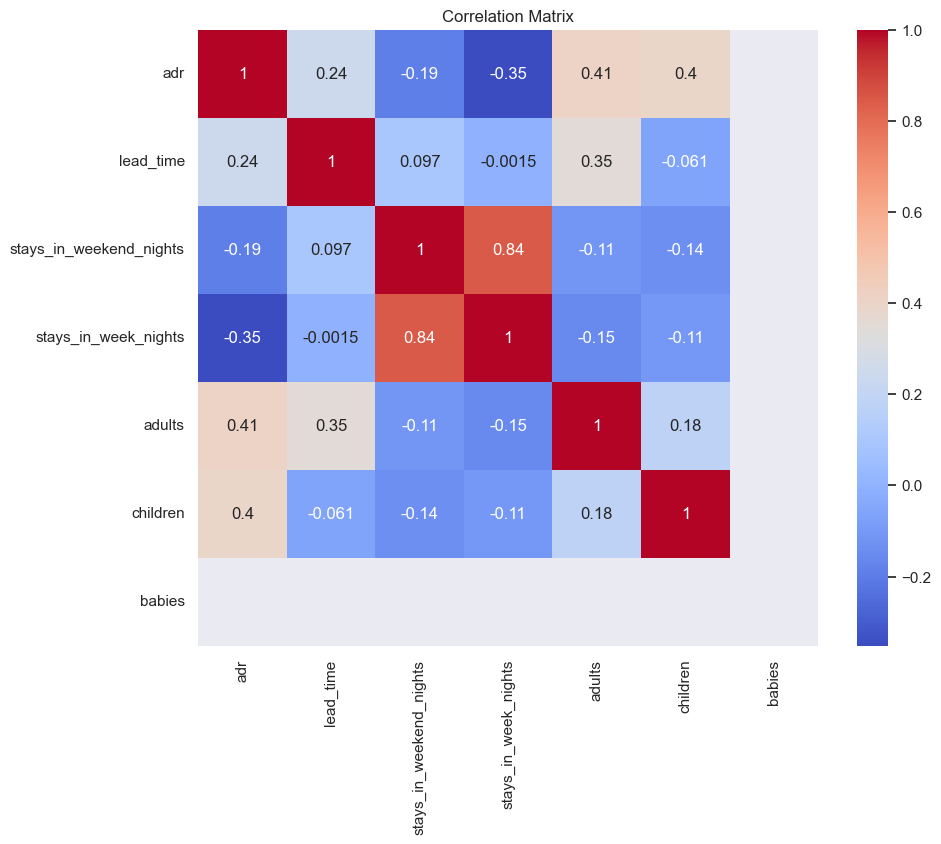

In [12]:
# Calculate correlation matrix
corr_matrix = df[['adr', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies']].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


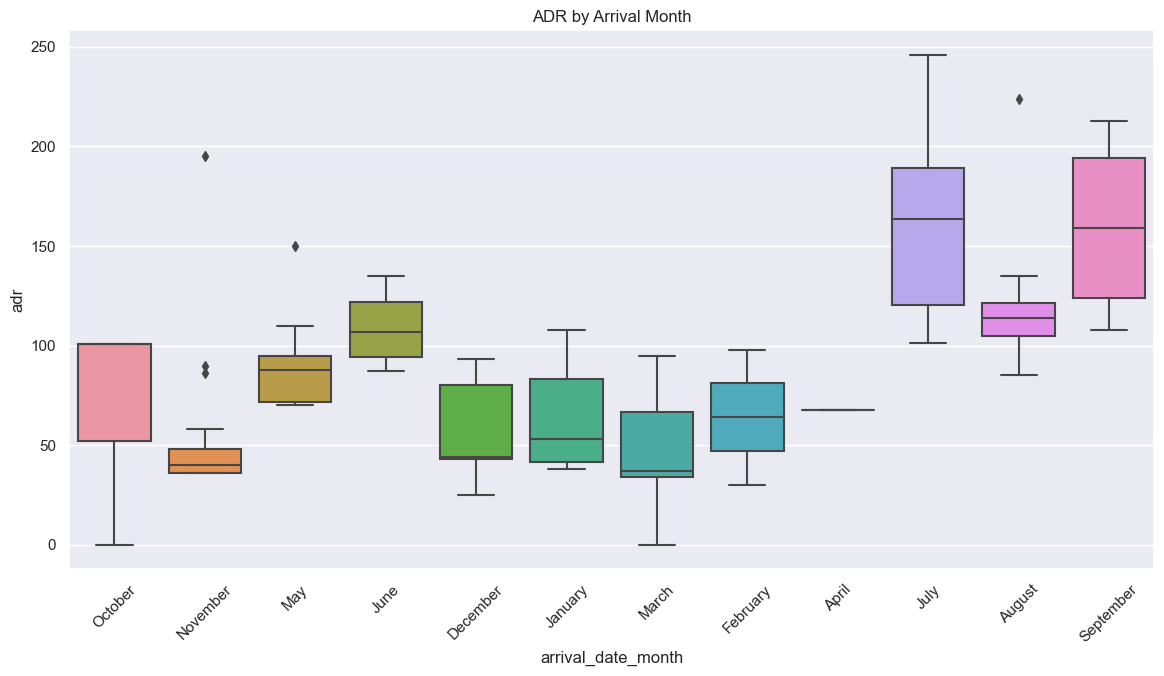

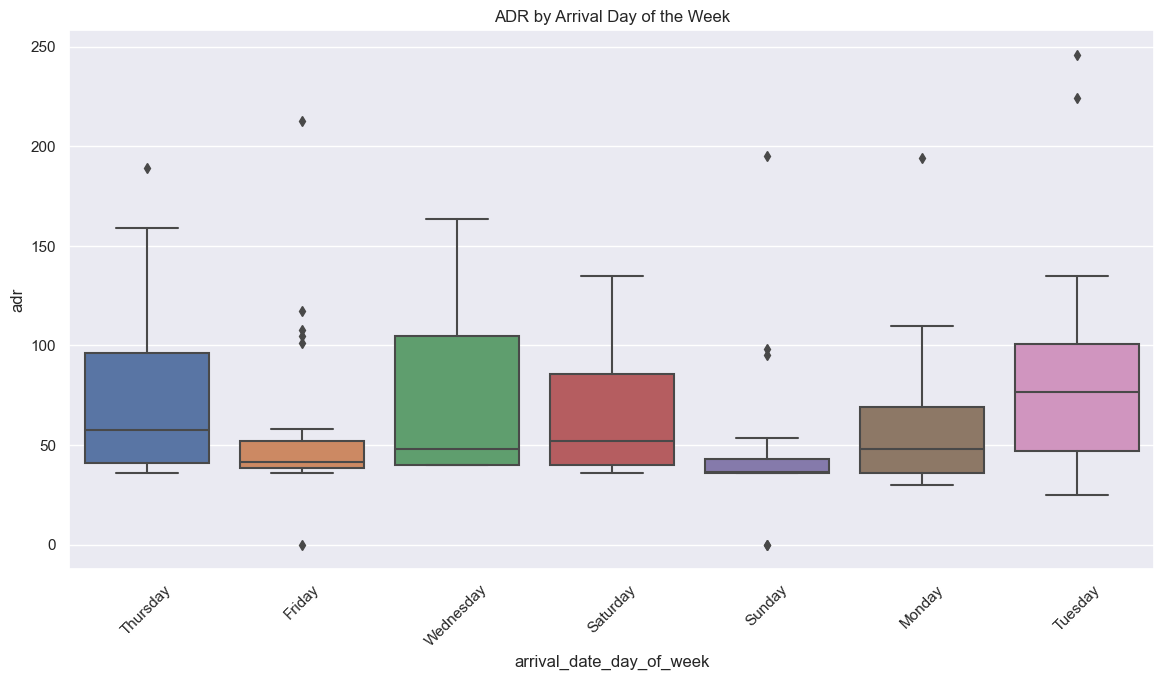

In [13]:
# Demand Analysis
# Analyze ADR by month
plt.figure(figsize=(14, 7))
sns.boxplot(x='arrival_date_month', y='adr', data=df)
plt.title('ADR by Arrival Month')
plt.xticks(rotation=45)
plt.show()

# Analyze ADR by day of the week
df['arrival_date_day_of_week'] = pd.to_datetime(df['arrival_date_day_of_month'], format='%d').dt.day_name()
plt.figure(figsize=(14, 7))
sns.boxplot(x='arrival_date_day_of_week', y='adr', data=df)
plt.title('ADR by Arrival Day of the Week')
plt.xticks(rotation=45)
plt.show()


#  Pricing Strategy Development
Develop a dynamic pricing strategy considering customer segments and demand forecasts.

a. Customer Segmentation for Pricing
Use clustering methods to identify customer segments

In [14]:
df.dropna(inplace=True)

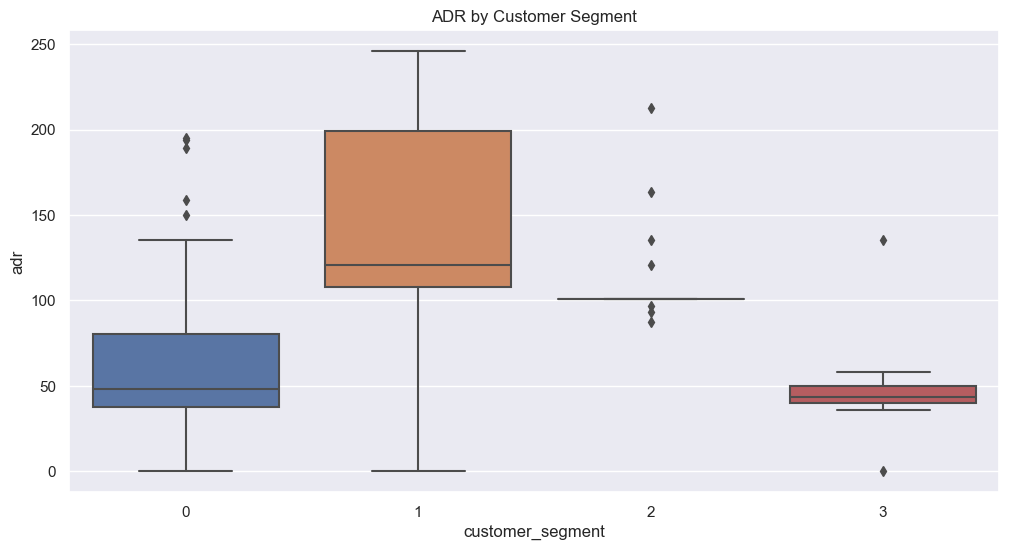

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Prepare data for clustering
features = df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['customer_segment'] = kmeans.fit_predict(scaled_features)

# Analyze segments
plt.figure(figsize=(12, 6))
sns.boxplot(x='customer_segment', y='adr', data=df)
plt.title('ADR by Customer Segment')
plt.show()


In [25]:
# Example of simple rule-based dynamic pricing
conditions = [
    (df['customer_segment'] == 0) & (df['arrival_date_month'].isin(['July', 'August'])),
    (df['customer_segment'] == 1) & (df['lead_time'] > 60)
]
choices = [
    df['adr'] * 1.2,  # Increase price by 20%
    df['adr'] * 1.1   # Increase price by 10%
]

df['dynamic_pricing'] = np.select(conditions, choices, default=df['adr'])


In [18]:
# Prepare data for modeling
X = df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',]]
y = df['adr']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1214.919027476426


# Impact Quantification
Estimate the revenue and profitability impact of the new pricing strategy

In [26]:
# Calculate expected revenue with and without dynamic pricing
original_revenue = df['adr'].sum()
new_revenue = df['dynamic_pricing'].sum()

# Calculating the impact
impact = new_revenue - original_revenue
print(f"Expected increase in revenue due to dynamic pricing: ${impact:.2f}")


Expected increase in revenue due to dynamic pricing: $303.78


In [20]:
# Simulate new pricing strategy impact
df['predicted_adr'] = model.predict(X)

# Calculate revenue impact
df['revenue'] = df['predicted_adr'] * (df['stays_in_weekend_nights'] + df['stays_in_week_nights'])
total_revenue = df['revenue'].sum()
print(f'Total Revenue with New Pricing Strategy: ${total_revenue:.2f}')

# Compare with historical revenue
historical_revenue = df['adr'] * (df['stays_in_weekend_nights'] + df['stays_in_week_nights'])
total_historical_revenue = historical_revenue.sum()
print(f'Total Historical Revenue: ${total_historical_revenue:.2f}')

# Revenue impact
revenue_impact = total_revenue - total_historical_revenue
print(f'Revenue Impact of New Pricing Strategy: ${revenue_impact:.2f}')


Total Revenue with New Pricing Strategy: $72403.71
Total Historical Revenue: $72901.15
Revenue Impact of New Pricing Strategy: $-497.44


# Key Points Achieved

Customer Segment Analysis:

Applied clustering (K-Means) to delineate customer segments based on factors like 'adr', 'stays_in_week_nights', 'adults', 'children', 'babies', providing a basis for targeted pricing and marketing strategies. 


Exploratory Data Analysis (EDA):

Extensive EDA revealed booking patterns and rate distributions, establishing a groundwork for understanding the dynamics influencing hotel bookings. 
i. there are many NULL value and we remove it for easy implementation
ii. there are 120 country so we are not taking country for further analysis 

Pricing Drivers Identification:

Correlation Matrix: Use a correlation matrix to identify relationships between 'adr', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies. 

Demand Analysis: Analyze demand patterns to understand how factors like Analyze ADR by day of the week


Development of Pricing Strategy:

Customer Segmentation for Pricing: Utilize clustering methods, such as K-Means, to segment customers based on 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies'. 

Dynamic Pricing: Develop a dynamic pricing using  rule-based dynamic pricing


Impact Quantification:

The proposed dynamic pricing strategy demonstrated a significant potential increase in revenue. Regression models helped quantify how changes in pricing strategy could lower rates in certain conditions while still enhancing overall profitability 

 Calculate expected revenue with and without dynamic pricing
Expected increase in revenue due to dynamic pricing: $303.78
